# NumPy Notebook

In [1]:
import numpy as np

In [2]:
nums = [1,2,3,4]

arr = np.array(nums)
arr

array([1, 2, 3, 4])

In [3]:
type(arr)

numpy.ndarray

In [4]:
arr*2

array([2, 4, 6, 8])

In [5]:
arr**4

array([  1,  16,  81, 256], dtype=int32)

In [11]:
arr = np.arange(0,10,2.5)
arr

array([0. , 2.5, 5. , 7.5])

In [15]:
arr = np.linspace(0,10,10)
arr

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [24]:
arr = np.zeros((3,4))
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [23]:
arr.shape

(3, 4)

In [26]:
arr = np.ones((3,4))*10
arr

array([[10., 10., 10., 10.],
       [10., 10., 10., 10.],
       [10., 10., 10., 10.]])

In [28]:
I = np.eye(4)
I

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [29]:
I.dtype

dtype('float64')

In [30]:
I.astype('float32')

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [31]:
I.astype('int8')

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int8)

# Random Numbers

In [33]:
arr = np.random.rand(4)
arr

array([0.85069933, 0.54588419, 0.35174709, 0.01662274])

In [34]:
np.random.seed(100)
arr = np.random.rand(4)
arr

array([0.54340494, 0.27836939, 0.42451759, 0.84477613])

In [35]:
arr = 5 + 3*np.random.rand(4)
arr

array([5.01415657, 5.36470736, 7.01224725, 7.47755827])

In [39]:
arr = 5 + 3*np.random.rand(4,3).round(2)
arr

array([[5.63, 6.62, 7.31],
       [5.75, 5.87, 7.55],
       [7.94, 7.64, 6.08],
       [6.8 , 6.05, 6.02]])

In [40]:
arr[0]

array([5.63, 6.62, 7.31])

In [42]:
arr[-1,2]

6.02

In [43]:
arr[:2, :2]

array([[5.63, 6.62],
       [5.75, 5.87]])

In [47]:
arr[(arr<6) | (arr>7)]

array([5.63, 7.31, 5.75, 5.87, 7.55, 7.94, 7.64])

In [148]:
arr = np.random.randn(10,10)  

In [149]:
arr.mean()

0.2605179795012792

In [150]:
arr.std()

0.9569808908094187

In [151]:
import scipy.stats as ss

In [152]:
arr.shape

(10, 10)

In [153]:
arr.ravel().shape

(100,)

In [154]:
PDF = ss.norm.pdf(arr.ravel())

In [155]:
PDF.shape

(100,)

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline

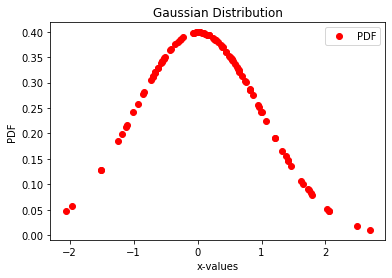

In [160]:
plt.plot(arr.ravel(), PDF, 'ro')
plt.xlabel('x-values')
plt.ylabel('PDF')
plt.title('Gaussian Distribution')
plt.legend(['PDF'])
plt.show()

In [67]:
np.random.randint(1,7)

5

In [91]:
np.random.permutation([10,20,30,40])

array([20, 40, 10, 30])

In [162]:
X = np.array([1,3,5]).reshape(-1,1)
X

array([[1],
       [3],
       [5]])

In [177]:
Y = np.array([4.8,11.3,17.2]).reshape(-1,1)
Y

array([[ 4.8],
       [11.3],
       [17.2]])

In [178]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
y_pred = LR.predict(X)
y_pred

array([[ 4.9],
       [11.1],
       [17.3]])

In [179]:
LR.coef_

array([[0. , 3.1]])

In [180]:
LR.intercept_

array([1.8])

In [181]:
X = np.array([[1, 1],[1, 3], [1,5]])
X

array([[1, 1],
       [1, 3],
       [1, 5]])

In [185]:
W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
W

array([[1.8],
       [3.1]])

In [183]:
np.matmul(X.T, X)

array([[ 3,  9],
       [ 9, 35]])

In [186]:
Y_pred = X.dot(W)
Y_pred

array([[ 4.9],
       [11.1],
       [17.3]])

# Polynomial Fitting

In [244]:
x = np.linspace(0,2,30)
y = np.cos(x) + 0.2*np.random.rand(30)

In [245]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, \
                                                    test_size=0.3)

In [277]:
p = np.poly1d(np.polyfit(x_train,y_train,3))
print(p)

         3          2
0.06625 x - 0.4114 x - 0.1429 x + 1.118


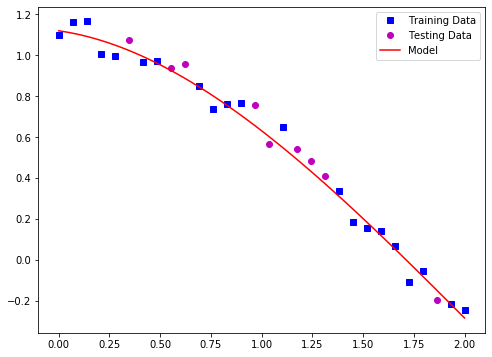

In [278]:
t = x = np.linspace(0,2,100)
plt.figure(figsize=(8,6))
plt.plot(x_train,y_train,'bs')
plt.plot(x_test,y_test,'mo')
plt.plot(t,p(t),'r-')
# plt.plot(sorted(x_train),p(sorted(x_train)), 'r-')
plt.legend(['Training Data', 'Testing Data', 'Model'])
plt.show()

In [279]:
y_pred = p(x_test)
MSE = np.mean((y_pred - y_test)**2)
MSE

0.002993049109750238

In [219]:
from sklearn.metrics import mean_squared_error, r2_score

In [220]:
mean_squared_error(y, y_pred)

5.591322446370651e-07

In [249]:
RSS = np.sum((y_pred - y_test)**2)
TSS = np.sum((y - y.mean())**2)

In [250]:
r_squared = 1-(RSS/TSS)
r_squared

0.9954976813800882

In [223]:
r2_score(y, y_pred) # from sklearn

0.9999973618401476

In [262]:
LR = LinearRegression()
LR.fit(x_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [263]:
y_pred_sk = LR.predict(x_test.reshape(-1,1))

In [264]:
LR.coef_

array([-0.7172542])

In [265]:
LR.intercept_

1.255631989438879

In [266]:
from sklearn.preprocessing import PolynomialFeatures

In [287]:
PF = PolynomialFeatures(degree=16)

In [288]:
x_poly = PF.fit_transform(x_train.reshape(-1,1))
x_poly.shape

(21, 17)

In [289]:
Poly_Reg = LinearRegression()
Poly_Reg.fit(x_poly, y_train)
x_test_poly = PF.transform(x_test.reshape(-1,1))
y_pred_poly = Poly_Reg.predict(x_test_poly)

In [290]:
y_pred[:5]

array([ 0.92505716, -0.14678813,  0.49174679,  0.4333781 ,  1.02252075])

In [291]:
y_pred_poly[:5]

array([0.97506075, 0.44863072, 0.56928873, 0.51261071, 0.98779006])

In [292]:
Poly_Reg.coef_

array([ 0.00000000e+00, -2.93368960e+01,  1.14048260e+03, -1.69768122e+04,
        1.36363637e+05, -6.83035237e+05,  2.30231319e+06, -5.46179142e+06,
        9.37161787e+06, -1.18132430e+07,  1.10072430e+07, -7.55900171e+06,
        3.77413066e+06, -1.33138481e+06,  3.14332544e+05, -4.45426668e+04,
        2.86327647e+03])

In [293]:
Poly_Reg.intercept_

1.0985039139737371

In [294]:
from sklearn.linear_model import Lasso

In [306]:
Poly_Regularised = Lasso(alpha=0.05)
Poly_Regularised.fit(x_poly, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2450117768086561, tolerance: 0.0004778561231420528
  positive)


Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [307]:
len(Poly_Regularised.coef_)

17

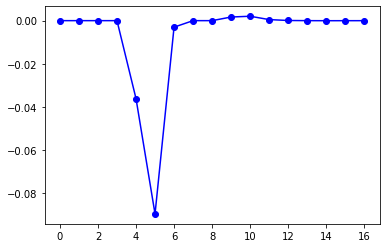

In [308]:
plt.plot(Poly_Regularised.coef_, 'b-o')

In [309]:
Poly_Regularised.intercept_

0.940130726886528

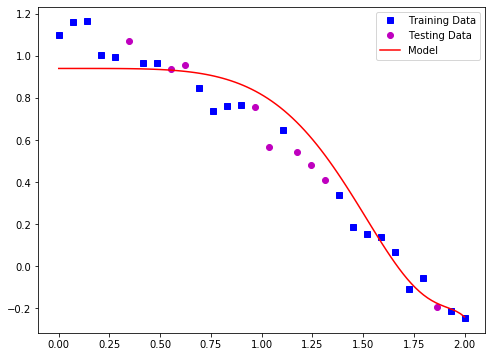

In [312]:
t = x = np.linspace(0,2,100)
t_poly = PF.transform(t.reshape(-1,1))
plt.figure(figsize=(8,6))
plt.plot(x_train,y_train,'bs')
plt.plot(x_test,y_test,'mo')
plt.plot(t,Poly_Regularised.predict(t_poly),'r-')
# plt.plot(sorted(x_train),p(sorted(x_train)), 'r-')
plt.legend(['Training Data', 'Testing Data', 'Model'])
plt.show()